# ASSIGNMENT 2
## Submission Deadline: 03/11/21, 2100 Hrs
## Submission Link: [https://forms.gle/wnUyJjhhbcFKdTGX8](https://forms.gle/wnUyJjhhbcFKdTGX8)

Name: Samarth Varma

Roll No.: 180655

IITK EMail: vsamarth@iitk.ac.in

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), an image folder, and Env folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Env folder is the environment implementation provided by us (DO NOT change it) and image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via following Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# Random Maze Environment

<b><center>Maze Environment</center></b> | <b><center>Maze Environment Transitions</center></b>
--- | ---
<img src="image/maze_env.png" style="height:300px"> | <img src="image/maze_env_transitions.png" style="height:300px">

In this assignment we will be exploring a variant of the Random Maze Environment (RME) that we have been looking in the lectures. The environment is represented as a grid world in Figure 1a. Random maze environment is a highly stochastic environment with 11 states: two terminal states (a goal state (G) and a hole state (H)) and 9 non-terminal states and a wall in between the environment. The wall behaves similar to the wall on the periphery of the environment, basically if an agent bumps against the wall, it bounces back. The boundary of the environment behaves similarly, if an agent hits the boundary it bounces back. The agent receives a reward of +1 when it lands in the goal state (3) and it receives a reward of -1 when it lands in the hole state (7). For rest of the transitions there is a reward of -0.04. Essentially the agent has the living cost of -0.04. The transitions are stochastic as shown in Figure 1b. In this environment, four actions are possible: left, top, right, and bottom. For every intended action, there is 80% chance of going in the intended direction and remaining 20% chances of going in either of the orthogonal directions. The 20% chance gets equally distributed between each of the orthogonal direction. The agent starts from state 8 (S). Assume γ = 0.99 for the problems below.

In this assignment we will be looking at control algorithms we learnt in Lecture 10 and 11. For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot. For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. As you are aware from your past experience, single run of the algorithm over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy.

In [1]:
# Environment setup
!pip install --editable Environments

Obtaining file:///C:/Users/varma/Documents/Repositories/assignment_2/Environments
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: environments
    Found existing installation: environments 1.0.0
    Uninstalling environments-1.0.0:
      Successfully uninstalled environments-1.0.0
  Running setup.py develop for environments


### <span style="color:red">Restart the kernel.</span>

In [1]:
# all imports go in here
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import math

In [2]:
# Create environment
env = gym.make('environments:random_maze-v0')

The environment can be interacted with via standard functions, reset() and step(). The environment uses the following structure.

#### States: 
        0        1        2         3(Goal)
        4        5(Wall)  6         7(Hole)
        8(Start) 9        10        11
#### Action space:
        0 -> LEFT
        1 -> UP
        2 -> RIGHT
        3 -> DOWN
#### Rewards:
        If Goal state: +1
        If Hole state: -1
        Otherwise: -0.04
#### Step() returns:
        state,       reward,            is_Terminal                               info
        Next state   Reward received    Whether next state is a terminal state    Info dictionary (Empty)

### All your hyperparameters should be defined here. We will change their value here and your code should work  accordingly.

In [3]:
# mention the values of all the hyperparameters to be used in the entire notebook

gamma = 0.99
alpha = 0.5
epsilon = 0.95
maxSteps = 500
noEpisodes = 20000
lda = 0.5
noPlanning = 1000
no_states = 12
no_actions = 4
maxTrajectory = 1000



In [5]:
# function to plot graph for given state-value and Q-value function vs Epsisodes
def plot(state_value, q_value):

    #True State Values taken from Midsem Solutions
    true_state = np.array([0.82442985, 0.89286374, 0.95464233, 0, 0.76427487, 0, 0.68820946, 0,0.69763948, 0.63906542, 0.60613373, 0.38186228])

    plt.figure(figsize=(20,10))
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,0], label = "State 0", color ='#1f77b4')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[0]), color ='#1f77b4')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,1], label = "State 1", color ='#ff7f0e')
    plt.plot(np.arange(start=1,stop=noEpisodes+1),np.full(noEpisodes,true_state[1]), color ='#ff7f0e')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,2], label = "State 2", color ='#2ca02c')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[2]), color ='#2ca02c')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,4], label = "State 4", color ='#d62728')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[4]), color ='#d62728')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,6], label = "State 6", color ='#9467bd')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[6]), color ='#9467bd')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,8], label = "State 8", color ='#8c564b')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[8]), color ='#8c564b')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,9], label = "State 9", color ='#e377c2')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[9]), color ='#e377c2')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,10], label = "State 10", color ='#7f7f7f')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[10]), color ='#7f7f7f')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), state_value[:,11], label = "State 11", color ='#bcbd22')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[11]), color ='#bcbd22')
    plt.xlabel("Episodes")
    plt.ylabel("State Value")
    plt.title("State Value vs Time Step/Episodes")
    plt.legend()
    plt.show()

    plt.figure(figsize=(20,10))
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,0,3], label = "q(0,3)", color ='#1f77b4')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[0]), color ='#1f77b4')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,1,2], label = "q(1,2)", color ='#ff7f0e')
    plt.plot(np.arange(start=1,stop=noEpisodes+1),np.full(noEpisodes,true_state[1]), color ='#ff7f0e')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,2,3], label = "q(2,3)", color ='#2ca02c')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[2]), color ='#2ca02c')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,4,3], label = "q(4,3)", color ='#d62728')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[4]), color ='#d62728')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,6,1], label = "q(6,1)", color ='#9467bd')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[6]), color ='#9467bd')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,8,2], label = "q(8,2)", color ='#8c564b')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[8]), color ='#8c564b')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,9,2], label = "q(9,2)", color ='#e377c2')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[9]), color ='#e377c2')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,10,1], label = "q(10,1)", color ='#7f7f7f')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[10]), color ='#7f7f7f')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), q_value[:,11,0], label = "q(11,0)", color ='#bcbd22')
    plt.plot(np.arange(start=1,stop=noEpisodes+1), np.full(noEpisodes,true_state[11]), color ='#bcbd22')
    plt.xlabel("Episodes")
    plt.ylabel("Q Value")
    plt.title("Q Value vs Time Step/Episodes")
    plt.legend()
    plt.show()

## Problem 1: Monte Carlo Control
(40+20+20+5+5+5+5=100 points)

Implement the Monte Carlo Control for the Random Maze Environment (RME) described above. In particular, you need to implement First Visit Monte Carlo Control (FMVCC) for finding the optimal policy for RME. Use the function definition (given below) as given in Lecture 10, slide 19.

`MonteCarloControl(env, γ, α0, ϵ0, maxSteps, noEpisodes, firstVisit = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [6]:
# First Visit Monte Carlo Control (FMVCC)
def decayLearningRate(initial_val, final_val, max_steps, decay_type):
    #This code is from the solutions of the midsem examination.
    if decay_type == 'linear':
        vals = np.linspace(initial_val, final_val, max_steps)
    else:
        # y = Aexp(kt)
        decay_rate = np.log(final_val/initial_val)/max_steps
        vals = initial_val*np.exp(decay_rate*np.arange(max_steps))
    
    decay_val = np.zeros((noEpisodes, 1)).squeeze()
    decay_val[:noEpisodes//2] = vals
    decay_val[noEpisodes//2:] = vals[-1]
    return decay_val

def generateTrajectory(env, q, epsi, maxsteps):
    t = []
    state, done = env.reset()
    for i in range(int(maxsteps)):
        opt_action = np.argmax(q[int(state)])
        if(np.random.rand() > epsi):
            action = opt_action
        else:
            action = np.random.randint(0,4)
        next_state, reward, done, _ = env.step(action)
        p = (state,action,reward,next_state)
        t.append(p)
        state = next_state
        if(done): return t
    return []

def GreedyPolicy(q):
    s = 12
    optimal_policy = np.zeros(s)
    for i in range(s):
        optimal_policy[i] = np.argmax(q[i])
    return optimal_policy

def monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes, firstVisit = True):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))

    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for e in range(noEpisodes):
        #alpha = alpha_learning[min(e,len(alpha_learning)-1)]
        #epsi = epsi_learning[min(e,len(epsi_learning)-1)]
        alpha_v = alpha_learning[e]
        epsi = epsi_learning[e]
        t = generateTrajectory(env, q, epsi, maxSteps)
        visited = np.zeros((12,4))
        for i, (s,a,r,s_d) in enumerate(t):
            s = int(s)
            if visited[s][a] and firstVisit:
                continue
            visited[s][a] = 1
            g = 0
            for j in range(i,len(t)):
                g = g + pow(gamma,j-i)*t[j][2]
            q[s][a] = q[s][a] + alpha_v*(g - q[s][a])
        q_value[e] = q
        state_value[e] = np.max(q, axis=1)
    optimal_policy = GreedyPolicy(q)
    
    return state_value, q_value, optimal_policy


env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.81051609 0.88350971 0.95391836 0.         0.74676887 0.
 0.68607468 0.         0.67586983 0.5870941  0.48080323 0.05832976]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


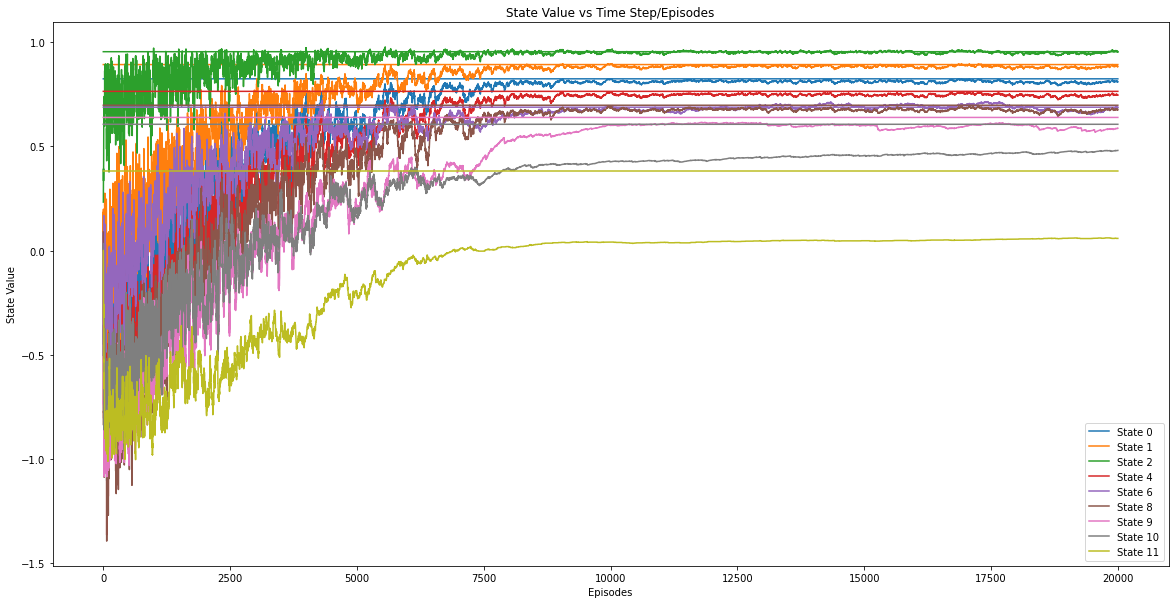

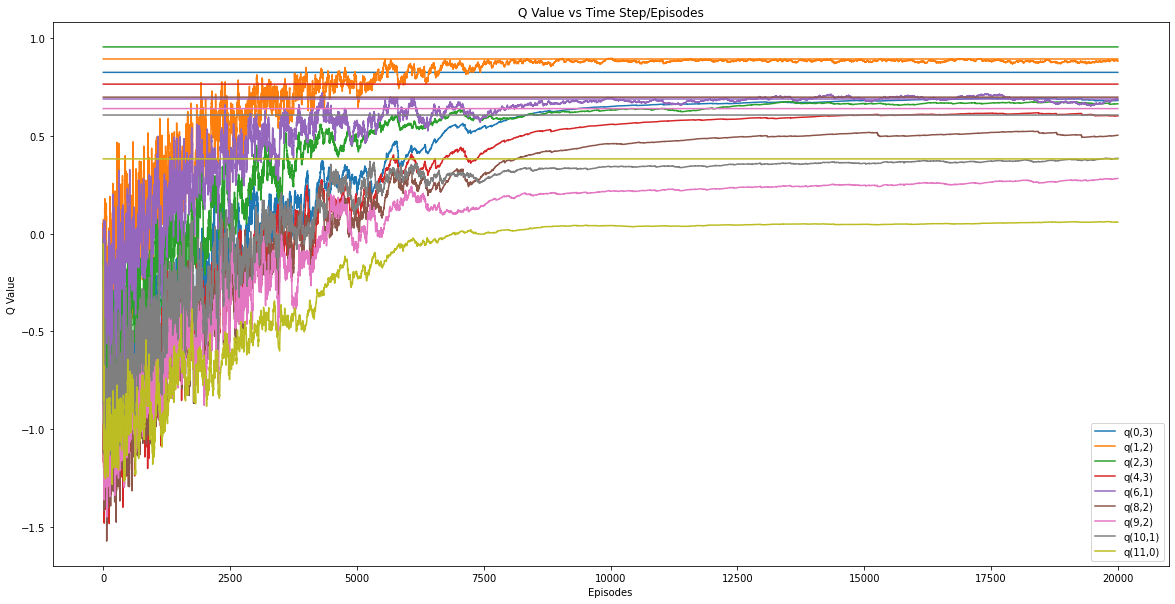

In [8]:
#your code goes here

env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = monte_carlo_control(env[i],gamma,alpha,epsilon,maxSteps, noEpisodes, firstVisit=True)
    print(f"env = {i+1} done")

state_value_mcmc = np.mean(state_v)
q_value_mcmc = np.mean(q_v)
print(state_value_mcmc[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_mcmc[noEpisodes-1])
print(optimal_policy)
plot(state_value_mcmc, q_value_mcmc)

a) Saved as q1_v in the images folder <br />
b) Saved as q1_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q1_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 12000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
The functions are unbiased but also has higher variance.


## Problem 2: SARSA (TD Control)
(40+20+20+5+5+5+5=100 points)

Implement the SARSA algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 22.

`SARSA(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [9]:
def actionSelect(s_d,q,epsi):
    state = int(s_d)
    opt_action = np.argmax(q[int(state)])
    if(np.random.rand() > epsi):
        action = opt_action
    else:
        action = np.random.randint(0,4)
    
    return action

# SARSA
def sarsa(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for e in range(noEpisodes):
        alpha_v = alpha_learning[e]
        epsi = epsi_learning[e]
        s, done = env.reset()
        state = int(s)
        action = actionSelect(state,q,epsi)
        while not done:
            s_d,r,done, _ = env.step(action)
            a_d = actionSelect(s_d,q,epsi)
            td_target = r
            if not done:
                td_target = td_target + gamma*q[s_d,a_d]
            td_error = td_target - q[state][action]
            q[state][action] = q[state][action] + alpha_v*td_error
            state = s_d
            action = a_d
        q_value[e] = q
        state_value[e] = np.max(q, axis=1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.80734608 0.88127887 0.9502646  0.         0.74462152 0.
 0.67953463 0.         0.67447157 0.61238867 0.49928599 0.0186797 ]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


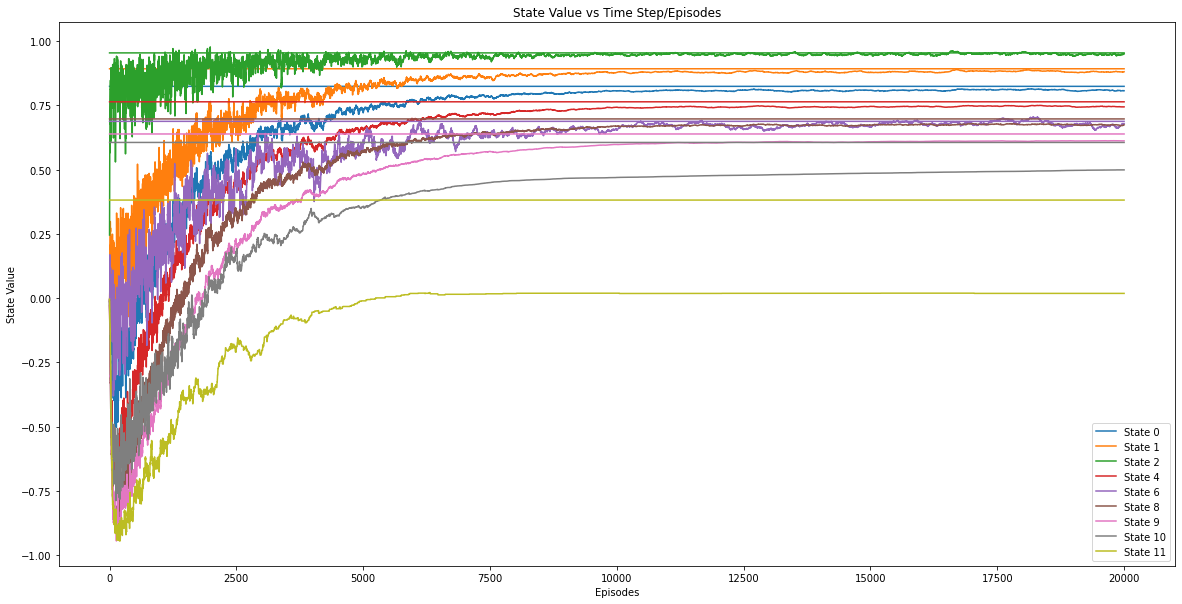

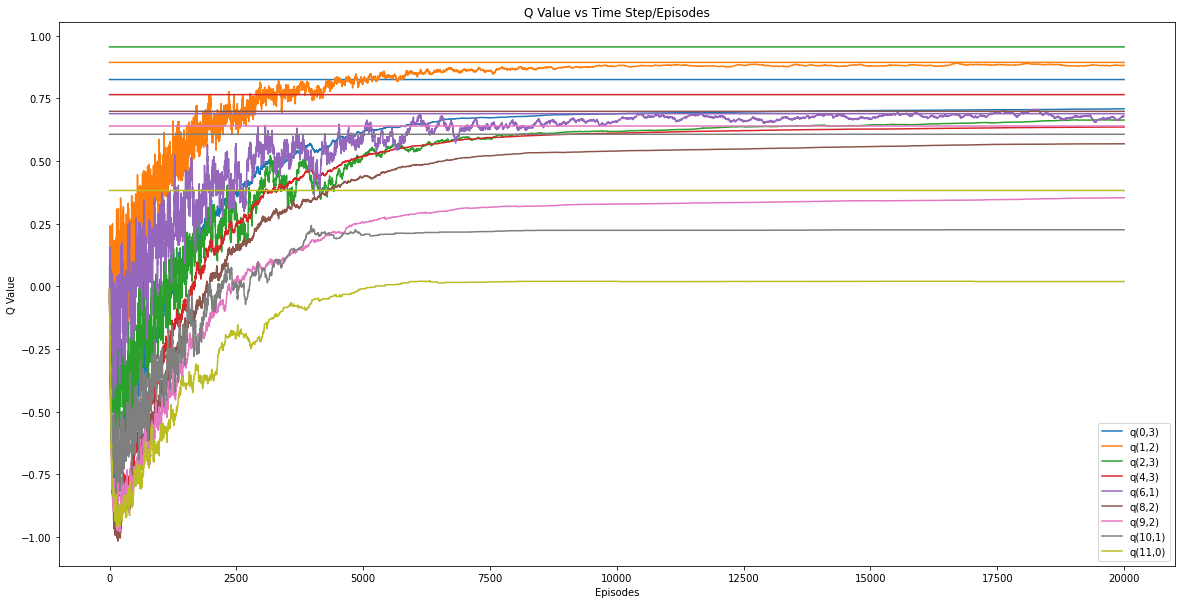

In [10]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = sarsa(env[i], gamma, alpha, epsilon, noEpisodes)
    print(f"env = {i+1} done")

state_value_sarsa = np.mean(state_v)
q_value_sarsa = np.mean(q_v)
print(state_value_sarsa[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_sarsa[noEpisodes-1])
print(optimal_policy)
plot(state_value_sarsa, q_value_sarsa)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q1_v in the images folder <br />
b) Saved as q1_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q1_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 12000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen. <br/>
Lower Variance and biased

## Problem 3: Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 25.

`Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [11]:
# Q-Learning
def q_learning(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for e in range(noEpisodes):
        alpha_v = alpha_learning[e]
        epsi = epsi_learning[e]
        s, done = env.reset()
        state = int(s)
        while not done:
            action = actionSelect(state,q,epsi)
            s_d,r,done, _ = env.step(action)
            td_target = r
            if not done:
                td_target = td_target + gamma*np.max(q[s_d])
            td_error = td_target - q[state][action]
            q[state][action] = q[state][action] + alpha_v*td_error
            state = s_d
        q_value[e] = q
        state_value[e] = np.max(q, axis=1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82600011 0.89343589 0.95341702 0.         0.7665535  0.
 0.7054403  0.         0.69956044 0.6388249  0.58064884 0.33444448]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


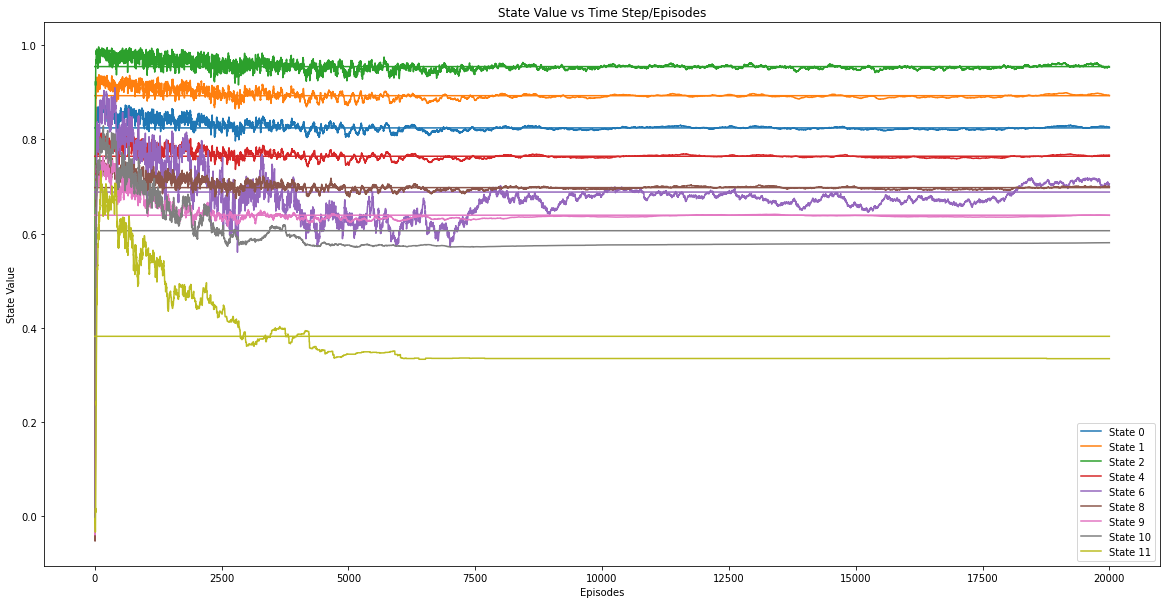

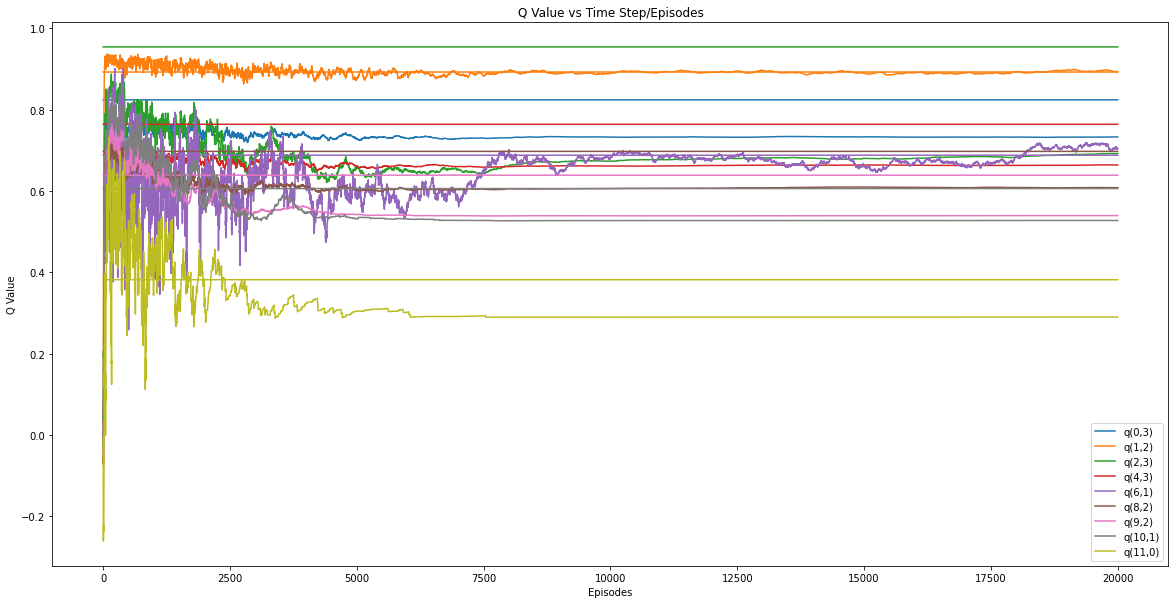

In [12]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = q_learning(env[i], gamma, alpha, epsilon, noEpisodes)
    print(f"env = {i+1} done")

state_value_q_learning = np.mean(state_v)
q_value_q_learning = np.mean(q_v)
print(state_value_q_learning[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_q_learning[noEpisodes-1])
print(optimal_policy)
plot(state_value_q_learning, q_value_q_learning)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q3_v in the images folder <br />
b) Saved as q3_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q3_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 10000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen. <br/>
Unbiased and Lower Variance with better estimation of the state and action functions.

## Problem 4: Double Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Double Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slides 27, 28.

`Double-Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [13]:
# Double Q-Learning

def double_q_learning(env, gamma, alpha, epsilon, noEpisodes):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]
    q_1 = np.zeros((no_states,no_actions))
    q_value_1 = np.zeros((noEpisodes,no_states,no_actions))
    q_2 = np.zeros((no_states,no_actions))
    q_value_2 = np.zeros((noEpisodes,no_states,no_actions))
    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for e in range(noEpisodes):
        alpha_v = alpha_learning[e]
        epsi = epsi_learning[e]
        s, done = env.reset()
        state = int(s)
        while not done:
            action = actionSelect(state,q,epsi)
            s_d,r,done,_ = env.step(action)
            if np.random.randint(2):
                a_q1 = np.argmax(q_1[s_d])
                td_target = r
                
                if not done:
                    td_target = td_target + gamma*q_2[s_d][a_q1]
                td_error = td_target - q_1[state][action]
                q_1[state][action] = q_1[state][action] + alpha_v*td_error
            else:
                a_q2 = np.argmax(q_2[s_d])
                td_target = r
                
                if not done:
                    td_target = td_target + gamma*q_1[s_d][a_q2]
                td_error = td_target - q_2[state][action]
                q_2[state][action] = q_2[state][action] + alpha_v*td_error
            state = s_d
        q_value_1[e] = q_1
        q_value_2[e] = q_2
        q = (q_1 + q_2)/2
        q_value = (q_value_1 + q_value_2)/2
    state_value = np.max(q_value, axis=2)
    optimal_policy = GreedyPolicy(q)
    
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82397511 0.89130145 0.95296369 0.         0.7636863  0.
 0.67269027 0.         0.69800658 0.63774599 0.579089   0.29728292]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


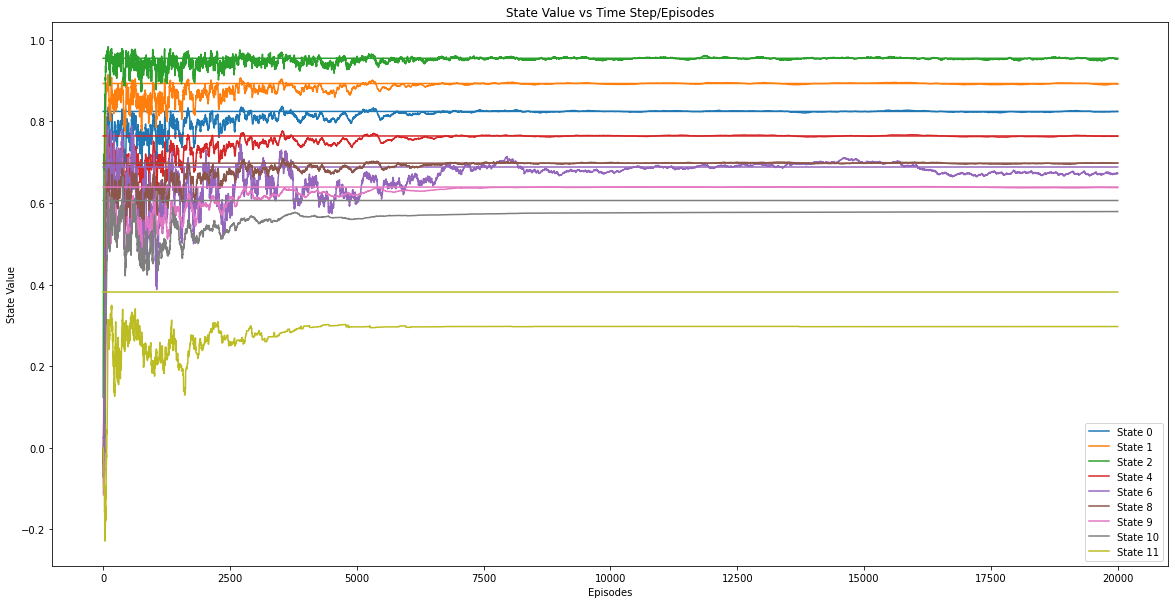

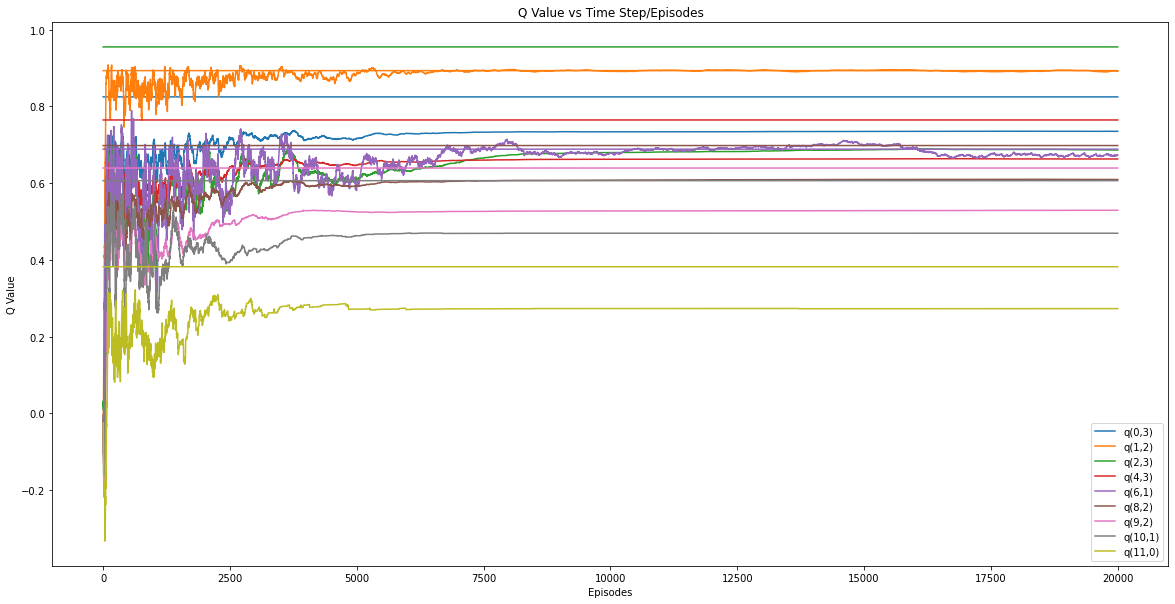

In [14]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = double_q_learning(env[i], gamma, alpha, epsilon, noEpisodes)
    print(f"env = {i+1} done")

state_value_double_q = np.mean(state_v)
q_value_double_q = np.mean(q_v)
print(state_value_double_q[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_double_q[noEpisodes-1])
print(optimal_policy)
plot(state_value_double_q, q_value_double_q)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q4_v in the images folder <br />
b) Saved as q4_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q4_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 5000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen. <br/>
Faster Convergence, lower variance and better estimation of the true values

## Problem 5: Comparing Control Algorithms
(20+5+5+5+5+5=40 points)

For FVMCC, SARSA, Q and Double-Q algorithms implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes. Policy Success Rate is de

ned as number of times the agent reaches the goal state out of the total number of the episodes run using a specific policy. Basically implement the following function that would return the policy success percentage. As you are training the agent, at each episode, you will have a version of the policy, use that  policy along with the function below to get the policy success rate.

    `def getPolicySuccessRate(env, π_current, goalState, maxEpisodes = 100, maxSteps = 200)`
    
    
    
(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

In [29]:
# run episodes with the policy passed as an argument and compute success rate
def get_policy_success_rate(env, current_policy, goal_state, maxEpisodes = 100, maxSteps = 200):
    total = 0
    policy_success_rate = np.zeros(maxEpisodes)
    for e in range(maxEpisodes):
        state, done = env.reset()
        for i in range(int(maxSteps)):
            action = current_policy[int(state)]
            next_state, reward, done, _ = env.step(action)
            state = next_state
            if(state == goal_state): 
                total = total + 1
                break
            if(done): break
        policy_success_rate[e] = total
    
    policy_success_rate = policy_success_rate/maxEpisodes
    return policy_success_rate
    

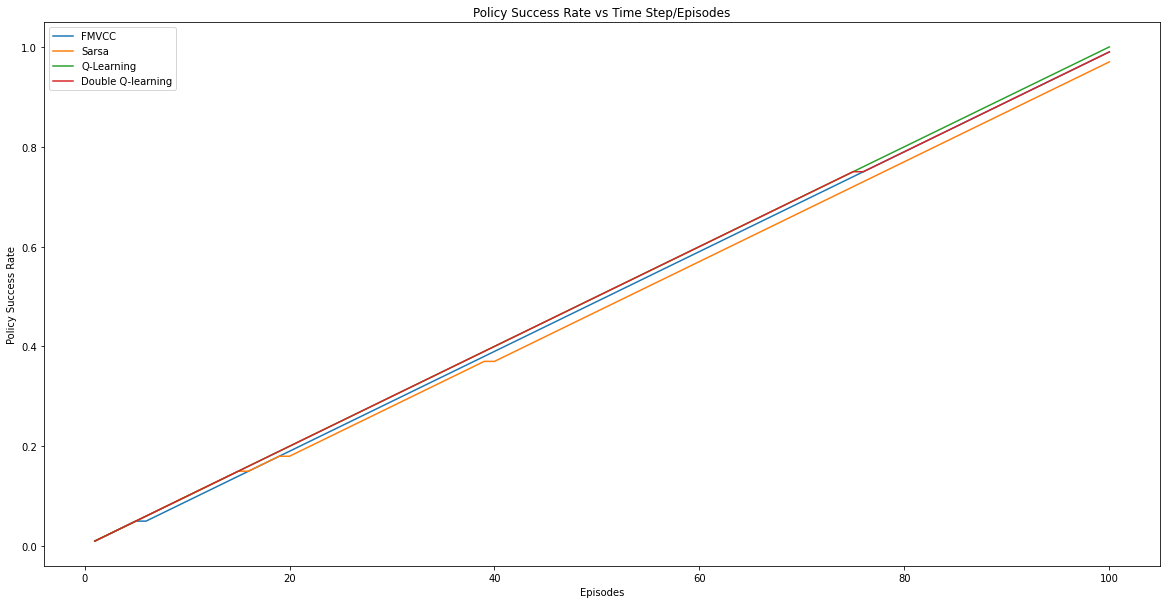

In [30]:
policy_fmvcc = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 1., 0.])
policy_sarsa = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])
policy_q = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])
policy_double_q = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

env= gym.make('environments:random_maze-v0')
env.seed(373)

plt.figure(figsize=(20,10))
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy_fmvcc,3), label = "FMVCC")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy_sarsa,3), label = "Sarsa")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy_q,3), label = "Q-Learning")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy_double_q,3), label = "Double Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Policy Success Rate")
plt.title("Policy Success Rate vs Time Step/Episodes")
plt.legend()
plt.show()

In [39]:
def estimated_return(env, q_val_opt, current_policy):
    estimated_r = np.zeros(noEpisodes)
    for e in range(noEpisodes):
        action = current_policy[8]
        state, reward, done, _ = env.step(action)
        action = current_policy[int(state)]
        estimated_r[e] = -0.04 + gamma*q_val_opt[e][int(state)][int(action)]
    return estimated_r

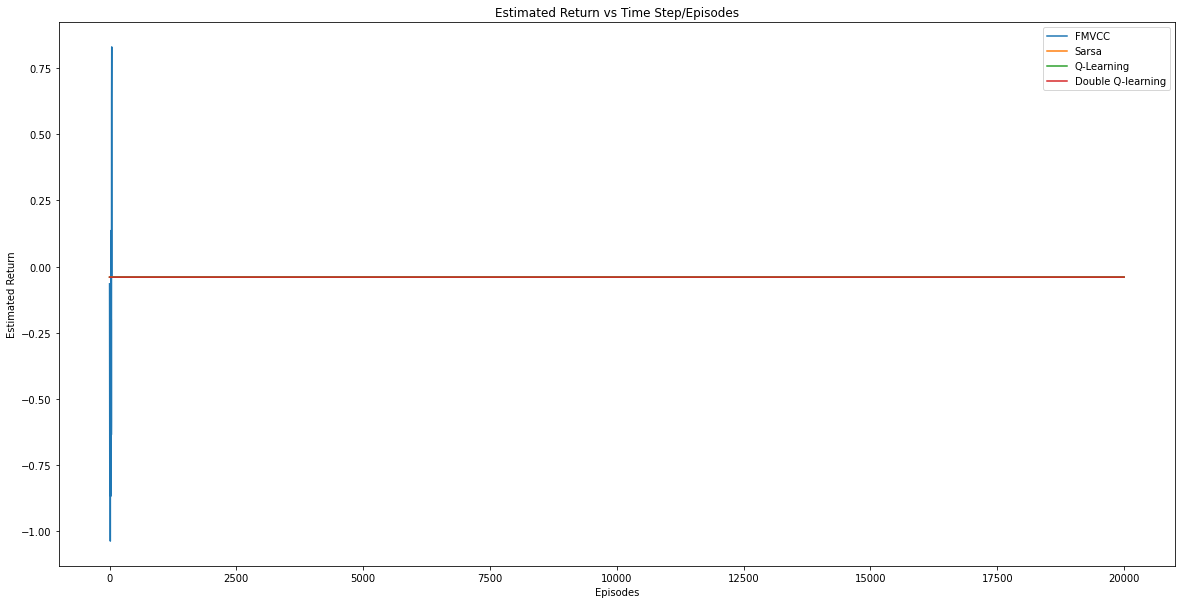

In [40]:
policy_fmvcc = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 1., 0.])
policy_sarsa = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])
policy_q = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])
policy_double_q = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

env= gym.make('environments:random_maze-v0')
env.seed(373)
estimated_r_fmvcc = estimated_return(env, q_value_mcmc, policy_fmvcc)
estimated_r_sarsa = estimated_return(env, q_value_sarsa, policy_fmvcc)
estimated_r_q = estimated_return(env, q_value_q_learning, policy_fmvcc)
estimated_r_double_q = estimated_return(env, q_value_double_q, policy_fmvcc)

plt.figure(figsize=(20,10))
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_r_fmvcc, label = "FMVCC")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_r_sarsa, label = "Sarsa")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_r_q, label = "Q-Learning")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_r_double_q, label = "Double Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Estimated Return")
plt.title("Estimated Return vs Time Step/Episodes")
plt.legend()
plt.show()

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) The plot is saved as q5 under the images folder </br>
b) Since the policy for sarsa, q and double q were the same and only one state was different from FMVCC (state = 10) - there wasn't any intuitive difference in the plots for the four. The plot is continuously growing and as it reaches episode = 100, we see that the rate is almost to 1, that means the policies work almost perfectly. </br>
c) Saved as Q5_2
d) Constant value function
e) 

## Problem 6: SARSA(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [15]:
# SARSA-lambda Replacing
def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        e.fill(0)
        s, done = env.reset()
        state = int(s)
        action = actionSelect(state,q,epsi)
        while not done:
            s_d,r,done,_ = env.step(action)
            a_d = actionSelect(s_d,q,epsi)
            td_target = r
            if not done:
                td_target = td_target + gamma*q[s_d][a_d]
            td_error = td_target - q[state][action]
            e[state][action] = e[state][action] + 1
            np.clip(e,0,1)
            q = q + alpha_v*td_error*e
            e = gamma*lda*e
            state = s_d
            action = a_d
        q_value[ep] = q
        state_value[ep] = np.max(q, axis=1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.80906523 0.88195229 0.94797594 0.         0.74589354 0.
 0.65769671 0.         0.67660046 0.61333151 0.51609671 0.08540759]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


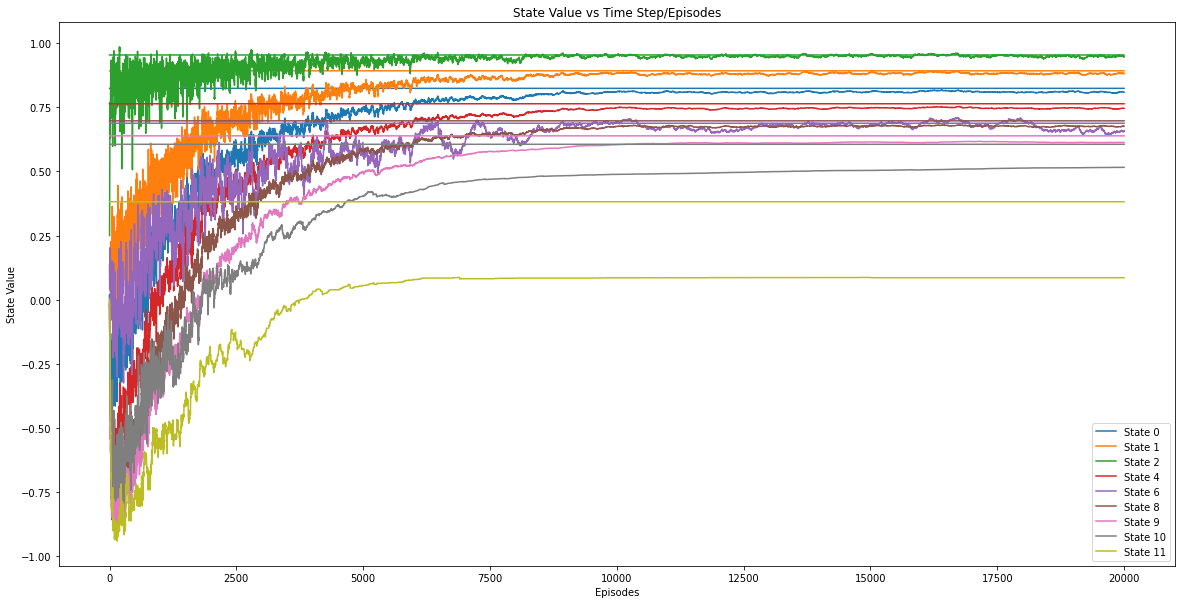

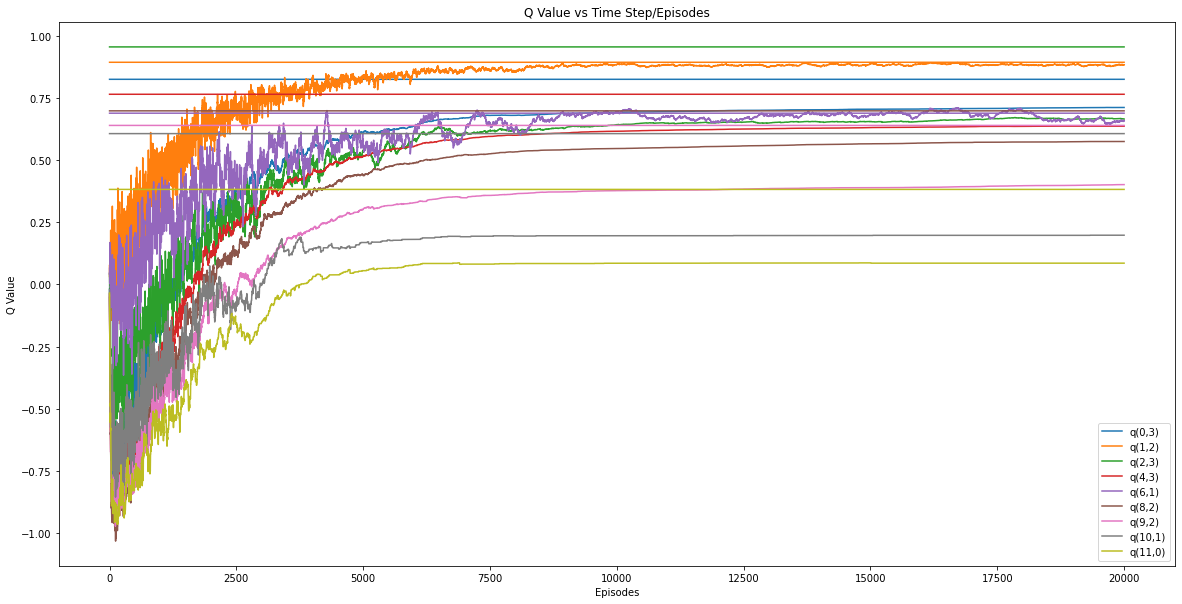

In [16]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = sarsa_lambda(env[i], gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True)
    print(f"env = {i+1} done")

state_value_sarsa_lamb = np.mean(state_v)
q_value_sarsa_lamb = np.mean(q_v)
print(state_value_sarsa_lamb[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_sarsa_lamb[noEpisodes-1])
print(optimal_policy)
plot(state_value_sarsa_lamb, q_value_sarsa_lamb)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q6_v in the images folder <br />
b) Saved as q6_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q6_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
Lambda = 0.5 <br/>
f) The state value converge around 10000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 7: SARSA(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [17]:
# SARSA-lambda Accumulating
def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)
    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        e.fill(0)
        s, done = env.reset()
        state = int(s)
        action = actionSelect(state,q,epsi)
        while not done:
            s_d,r,done,_ = env.step(action)
            a_d = actionSelect(s_d,q,epsi)
            td_target = r
            if not done:
                td_target = td_target + gamma*q[s_d][a_d]
            td_error = td_target - q[state][action]
            e[state][action] = e[state][action] + 1
            q = q + alpha_v*td_error*e
            e = gamma*lda*e
            state = s_d
            action = a_d
        q_value[ep] = q
        state_value[ep] = np.max(q, axis=1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.80906523 0.88195229 0.94797594 0.         0.74589354 0.
 0.65769671 0.         0.67660046 0.61333151 0.51609671 0.08540759]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


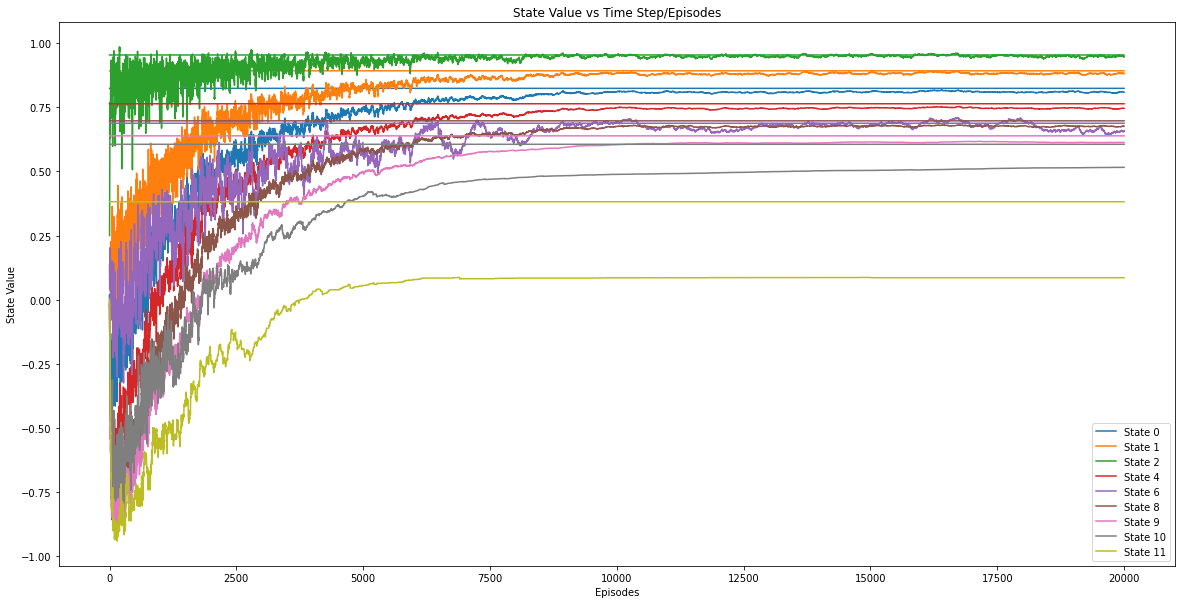

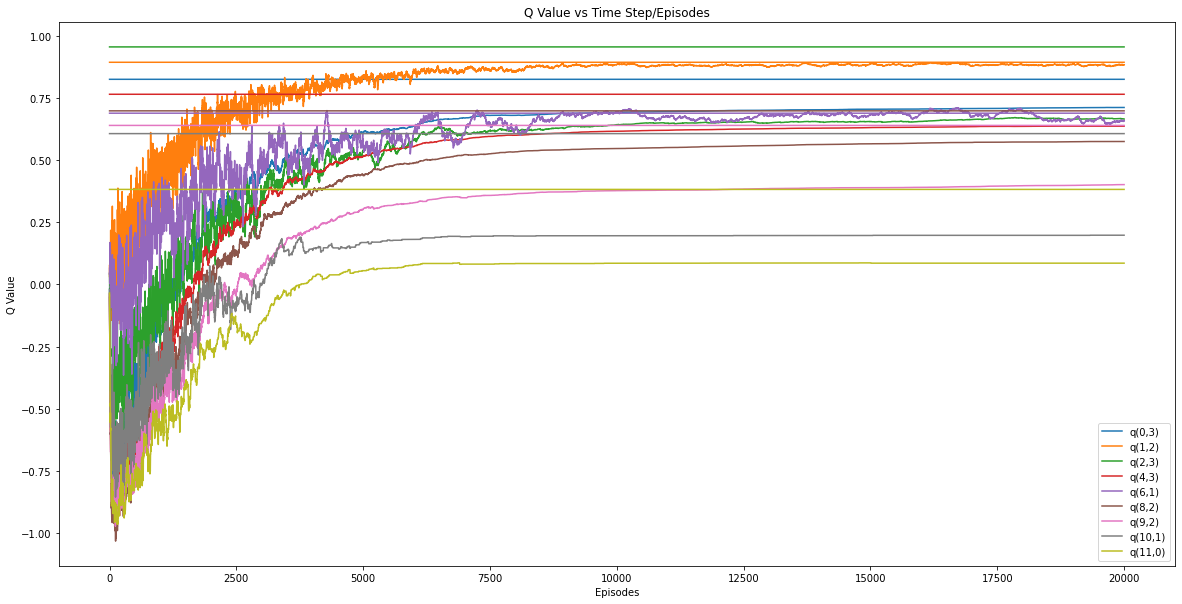

In [18]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = sarsa_lambda(env[i], gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False)
    print(f"env = {i+1} done")

state_value_sarsa_lamb_f = np.mean(state_v)
q_value_sarsa_lamb_f = np.mean(q_v)
print(state_value_sarsa_lamb_f[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_sarsa_lamb_f[noEpisodes-1])
print(optimal_policy)
plot(state_value_sarsa_lamb_f, q_value_sarsa_lamb_f)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q7_v in the images folder <br />
b) Saved as q7_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q7_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 7500 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 8: Q(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [19]:
# Q-lambda Replacing
def q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)

    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        e.fill(0)
        s, done = env.reset()
        a = actionSelect(s,q,epsi)
        while not done:
            s_d,r,done,_ = env.step(a)
            a_d = actionSelect(s_d,q,epsi)
            if q[s_d][a_d] == np.max(q[s_d,:]):
                s_d_greedy = True
            else:
                s_d_greedy = False
            td_target = r
            if not done:
                td_target = td_target + gamma*np.max(q[s_d, :])
            td_error = td_target - q[s][a]
            e[s].fill(0)
            e[s][a] = e[s][a] + 1
            q = q + alpha_v*td_error*e
            if s_d_greedy:
                e = gamma*lda*e
            else:
                e.fill(0)
            s = s_d
            a = a_d
        q_value[ep] = q
        state_value[ep] = np.max(q, axis = 1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82304595 0.8918588  0.95318917 0.         0.76421436 0.
 0.67307613 0.         0.69839401 0.63829565 0.58373127 0.35214069]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


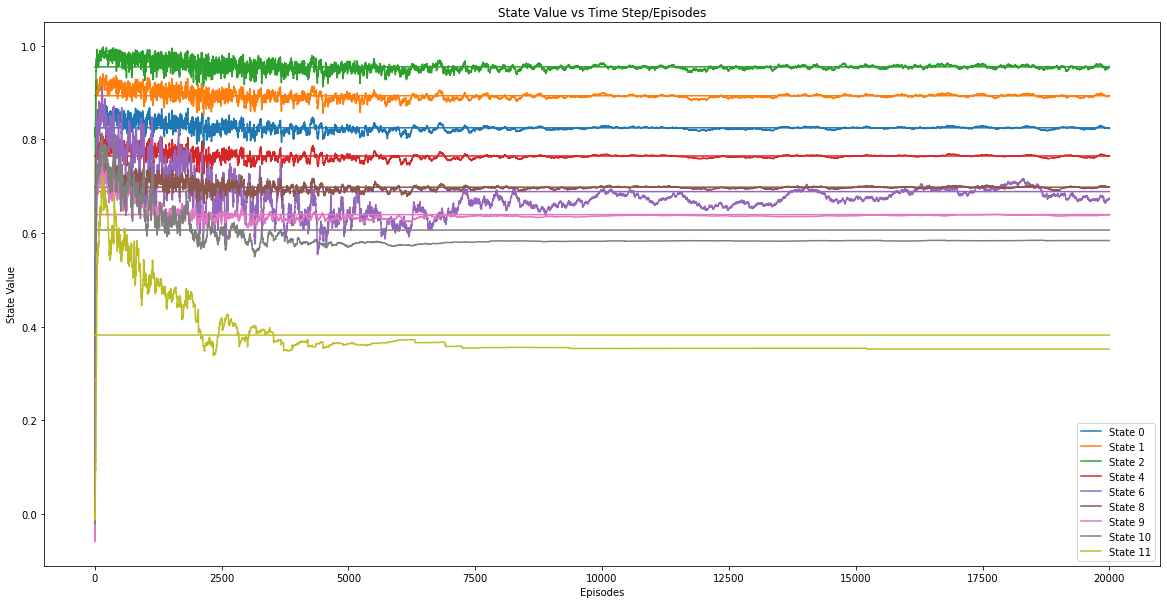

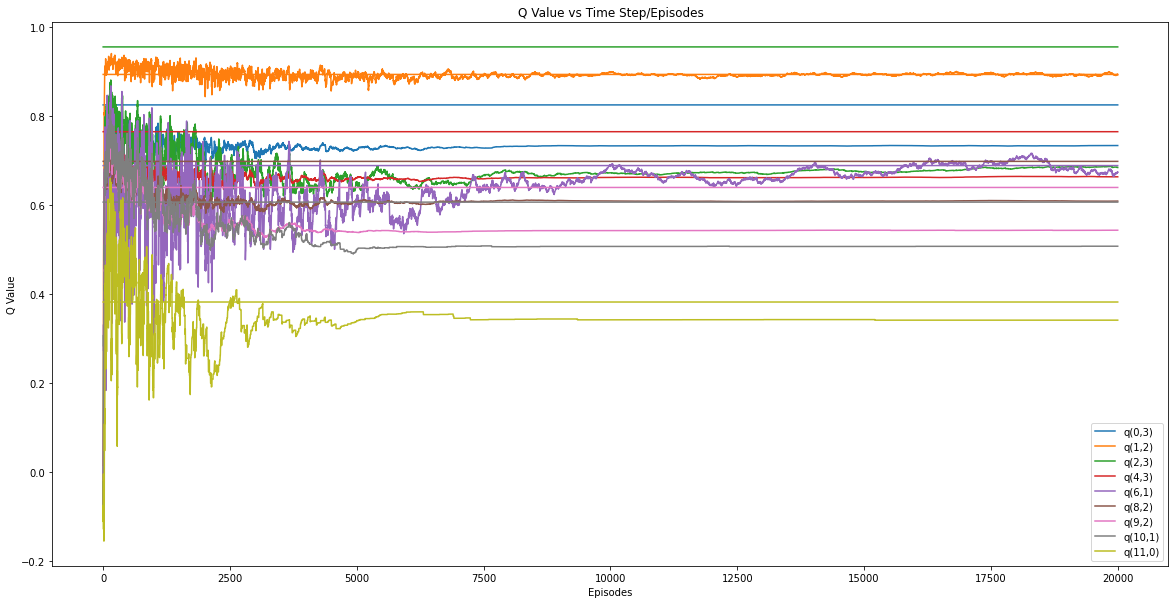

In [20]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = q_lambda(env[i], gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True)
    print(f"env = {i+1} done")

state_value_q_lamb_t = np.mean(state_v)
q_value_q_lamb_t = np.mean(q_v)
print(state_value_q_lamb_t[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_q_lamb_t[noEpisodes-1])
print(optimal_policy)
plot(state_value_q_lamb_t, q_value_q_lamb_t)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q8_v in the images folder <br />
b) Saved as q8_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q8_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 12000 episodes, approximating to their true values except states 10 and 11, which won't have much exposure to the agent as they are at the other end of the environment. The only way to improve those values would be to incorporate greater episode length but not feasible computationally. <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 9: Q(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [21]:
# Q-lambda Accumulating
def q_lambda_acc(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)

    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        e.fill(0)
        s, done = env.reset()
        a = actionSelect(s,q,epsi)
        while not done:
            s_d,r,done,_ = env.step(a)
            a_d = actionSelect(s_d,q,epsi)
            if q[s_d][a_d] == np.max(q[s_d,:]):
                s_d_greedy = True
            else:
                s_d_greedy = False
            td_target = r
            if not done:
                td_target = td_target + gamma*np.max(q[s_d, :])
            td_error = td_target - q[s][a]
            e[s][a] = e[s][a] + 1
            q = q + alpha_v*td_error*e
            if s_d_greedy:
                e = gamma*lda*e
            else:
                e.fill(0)
            s = s_d
            a = a_d
        q_value[ep] = q
        state_value[ep] = np.max(q, axis = 1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82679458 0.89507558 0.9562998  0.         0.76581028 0.
 0.66887071 0.         0.69962039 0.63807497 0.58983043 0.37309213]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


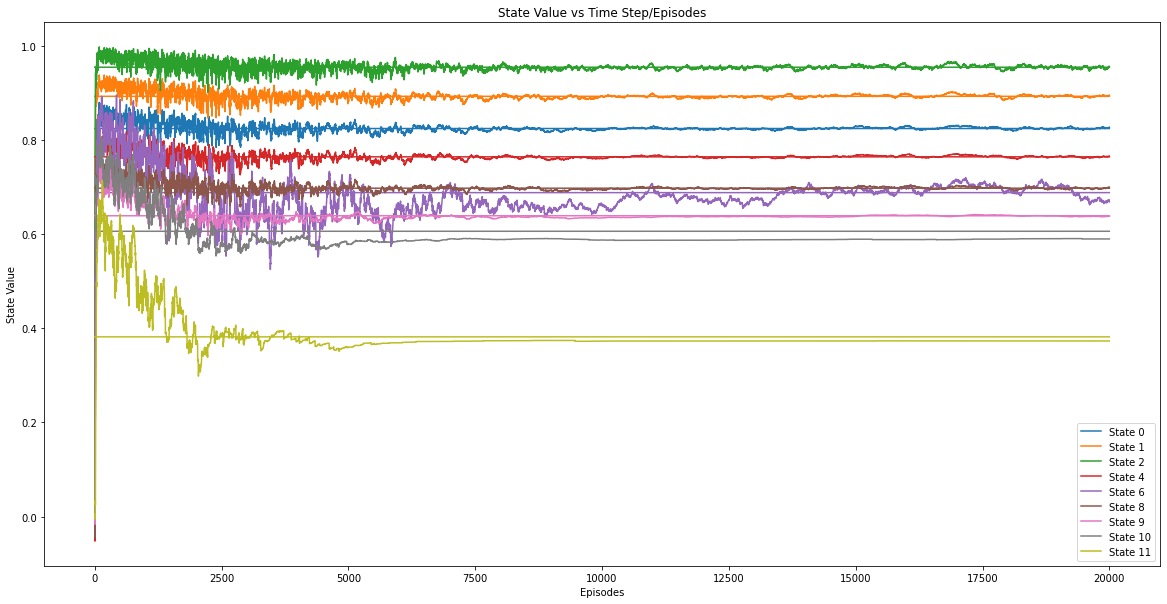

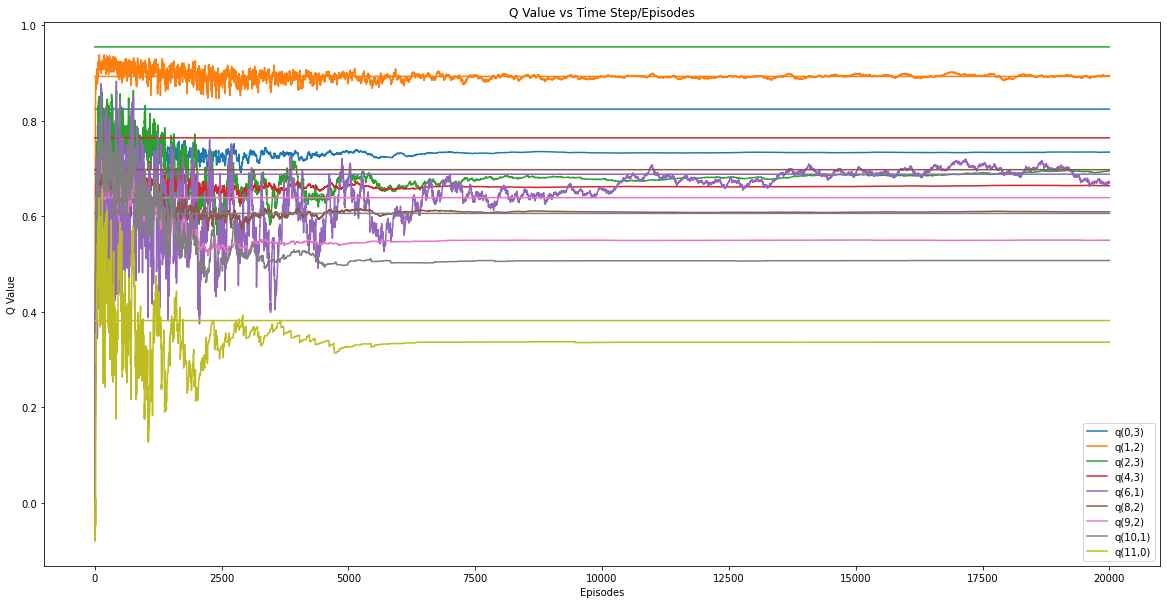

In [22]:
#your code goes here

env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = q_lambda_acc(env[i], gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = False)
    print(f"env = {i+1} done")

state_value_q_lamb_f = np.mean(state_v)
q_value_q_lamb_f = np.mean(q_v)
print(state_value_q_lamb_f[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_q_lamb_f[noEpisodes-1])
print(optimal_policy)
plot(state_value_q_lamb_f, q_value_q_lamb_f)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q9_v in the images folder <br />
b) Saved as q9_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q9_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
f) The state value converge around 7500 episodes, and the approximation is very close to the true values <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 10: Dyna-Q
(40+20+20+5+5+5+5=100 points)

Implement the Dyna-Q algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 36, 37.

`Dyna-Q(env, γ, α0, ϵ0, noEpisodes, noPlanning)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [23]:
# Dyna-Q
def getVisitedStatesAndActionsTaken(T):
    
    x = np.nonzero(T)
    s_visited = np.unique(x[0])
    a_visited = np.unique(x[1])
    return s_visited, a_visited
    

def dyna_q(env, gamma, alpha, epsilon, noEpisodes, noPlanning):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    T = np.zeros((no_states,no_actions,no_states))
    R = np.zeros((no_states,no_actions,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)

    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        s, done = env.reset()
        e.fill(0)
        while not done:
            a = actionSelect(s,q,epsi)
            s_d,r,done,_ = env.step(a)
            T[s][a][s_d] = T[s][a][s_d] + 1
            rDiff = r - R[s][a][s_d]
            R[s][a][s_d] = R[s][a][s_d] + (rDiff/T[s][a][s_d])
            td_target = r
            if not done:
                td_target = td_target + gamma*np.max(q[s_d, :])
            td_error = td_target - q[s][a]
            q[s][a] = q[s][a] + alpha_v*td_error
            s_back = s_d
            for _ in range(noPlanning):
                if(np.sum(q) == 0): break
                s_visited,a_taken = getVisitedStatesAndActionsTaken(T)
                s = np.random.choice(s_visited)
                a = np.random.choice(a_taken)
                if np.sum(T[s,a]==0):
                    break
        
                prob_s_d = T[s][a]/np.sum(T[s,a,:])
                s_d = np.random.choice(a = 12,size = 1,p=prob_s_d)
                r = R[s][a][s_d]
                td_target = r + gamma*np.max(q[s_d,:])
                td_error = td_target - q[s][a]
                q[s][a] = q[s][a] + alpha_v*td_error
            s = s_back
        q_value[ep] = q
        state_value[ep] = np.max(q,axis=1)
    optimal_policy = GreedyPolicy(q)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82248166 0.88981413 0.9528145  0.         0.76205827 0.
 0.666377   0.         0.69441052 0.63494362 0.58101044 0.35193374]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


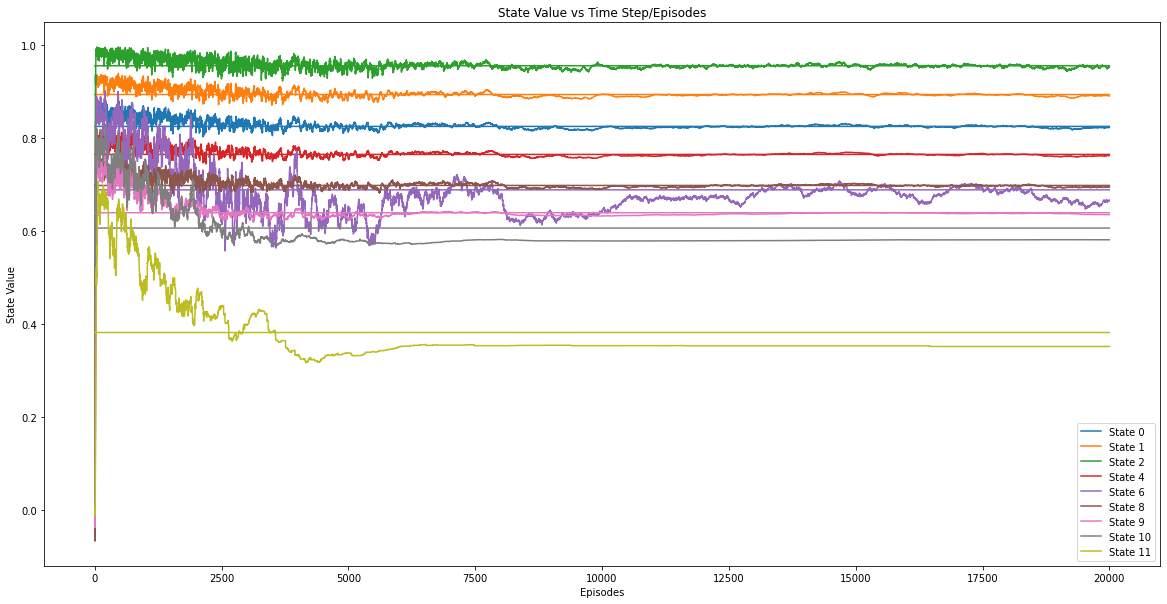

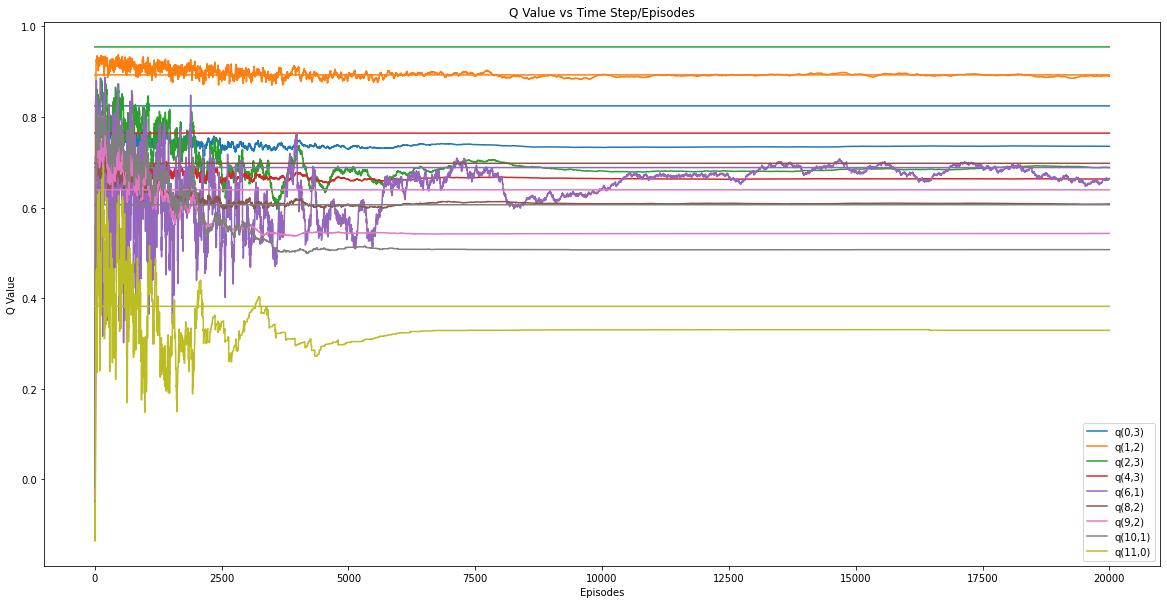

In [24]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = dyna_q(env[i], gamma, alpha, epsilon, noEpisodes, noPlanning)
    print(f"env = {i+1} done")

state_value_dyna_q = np.mean(state_v)
q_value_dyna_q = np.mean(q_v)
print(state_value_dyna_q[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_dyna_q[noEpisodes-1])
print(optimal_policy)
plot(state_value_dyna_q, q_value_dyna_q)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q10_v in the images folder <br />
b) Saved as q10_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q10_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
NoPlanning = 1000 <br/>
f) The state value converge around 10000 episodes, and the approximation is very close to the true values  <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 11: Trajectory Learning
(40+20+20+5+5+5+5=100 points)

Implement the Trajectory Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 40, 41, 42.

`TrajectorySampling(env, γ, α0, ϵ0, noEpisodes, maxTrajectory)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [25]:
# Trajectory sampling
def trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes, maxTrajectory):
    # your code goes here
        
    # return state-value,q-value and optimal-policy
    # state_value is a numpy array of shape [noEpisodes, states]

    q = np.zeros((no_states,no_actions))
    q_value = np.zeros((noEpisodes,no_states,no_actions))
    state_value = np.zeros((noEpisodes,no_states))
    T = np.zeros((no_states,no_actions,no_states))
    R = np.zeros((no_states,no_actions,no_states))
    e = np.zeros((no_states,no_actions))
    p = noEpisodes/2
    p = int(p)

    alpha_learning = decayLearningRate(alpha, 0.01, p, 'exponential')
    epsi_learning = decayLearningRate(epsilon, 0.05, p, 'exponential')
    for ep in range(noEpisodes):
        alpha_v = alpha_learning[ep]
        epsi = epsi_learning[ep]
        s, done = env.reset()
        e.fill(0)
        while not done:
            a = actionSelect(s,q,epsi)
            s_d,r,done,_ = env.step(a)
            T[s][a][s_d] = T[s][a][s_d] + 1
            rDiff = r - R[s][a][s_d]
            R[s][a][s_d] = R[s][a][s_d] + (rDiff/T[s][a][s_d])
            td_target = r
            if not done:
                td_target = td_target + gamma*np.max(q[s_d, :])
            td_error = td_target - q[s][a]
            q[s][a] = q[s][a] + alpha_v*td_error
            s_back = s_d
            for _ in range(maxTrajectory):
                if(np.sum(q) == 0): break
                a = actionSelect(s,q,epsi)
                if np.sum(T[s,a]==0):
                    break
        
                prob_s_d = T[s][a]/np.sum(T[s,a,:])
                s_d = np.random.choice(a=12,size=1,p=prob_s_d)
                r = R[s][a][s_d]
                td_target = r + gamma*np.max(q[s_d,:])
                td_error = td_target - q[s][a]
                q[s][a] = q[s][a] + alpha_v*td_error
                s = s_d
            s = s_back
        q_value[ep] = q
        state_value[ep] = np.max(q,axis=1)
    return state_value, q_value, optimal_policy

env = 1 done
env = 2 done
env = 3 done
env = 4 done
env = 5 done
env = 6 done
env = 7 done
env = 8 done
env = 9 done
env = 10 done
[0.82547101 0.89562339 0.96002603 0.         0.76563832 0.
 0.69164712 0.         0.69882067 0.63812661 0.57829536 0.36046628]
[2. 2. 2. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


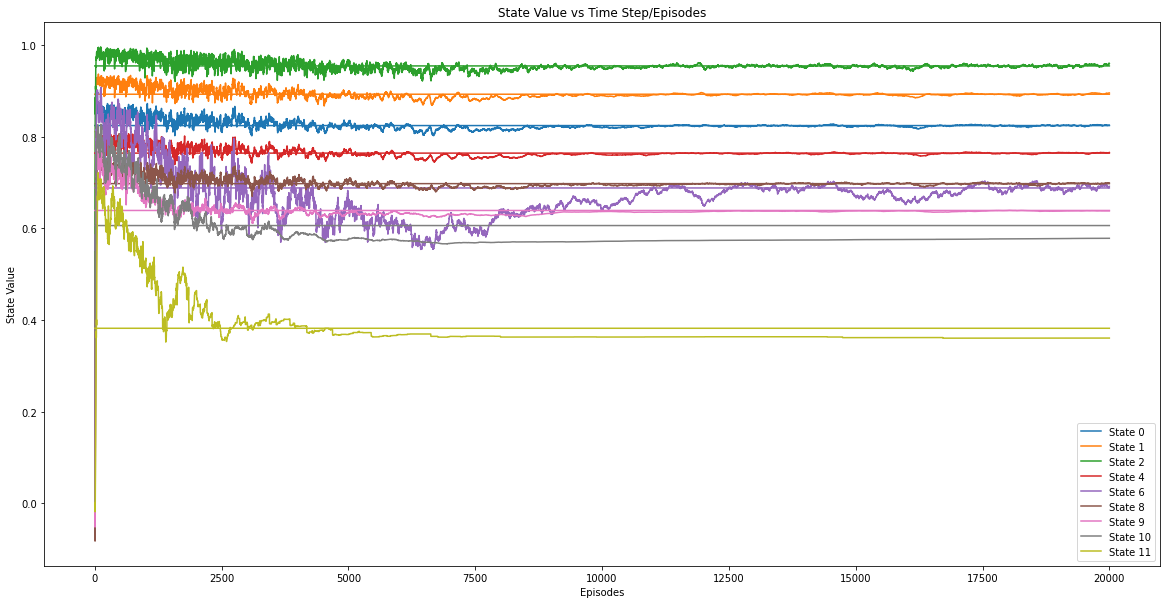

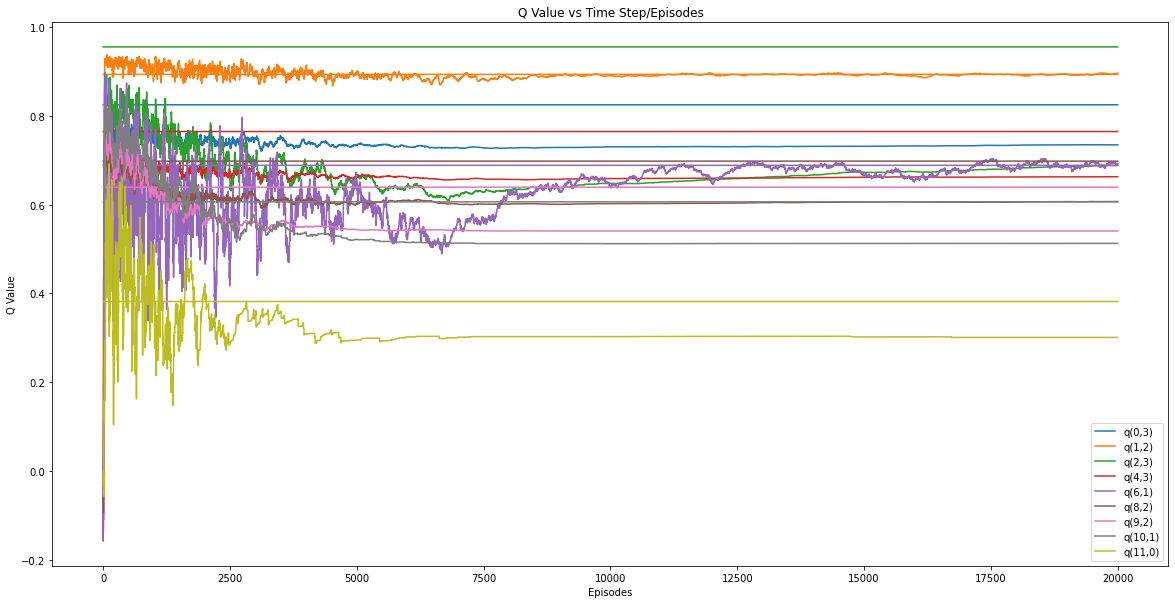

In [26]:
#your code goes here
env = np.ndarray((10,),dtype = object)

for i in range(10):
    env[i] = gym.make('environments:random_maze-v0')
    env[i].seed(373 + i)

state_v = np.ndarray((10,),dtype = object)
q_v = np.ndarray((10,),dtype = object)

for i in range(10):
    state_v[i], q_v[i], optimal_policy = trajectory_sampling(env[i], gamma, alpha, epsilon, noEpisodes, maxTrajectory)
    print(f"env = {i+1} done")

state_value_tj_sampling = np.mean(state_v)
q_value_tj_sampling = np.mean(q_v)
print(state_value_tj_sampling[noEpisodes-1])
optimal_policy = GreedyPolicy(q_value_tj_sampling[noEpisodes-1])
print(optimal_policy)
plot(state_value_tj_sampling, q_value_tj_sampling)

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q10_v in the images folder <br />
b) Saved as q10_q in the images folder <br />
c) Used 10 envs with seeds from 373 (included) to 382 (included) <br />
d) Saved as q10_policy in the images folder <br />
e) MaxSteps = 500. This value is already high for a smaller environment. The algorithm works smoothly under this value so there is no problem with keeping it as 500.  <br />
Epsilon decays from 0.95, which basically signifies more exploration in the beginning and more greedy in the end.
Alpha learning is decayed from 0.5 to 0.01 <br />
MaxTrajectory = 1000 <br/>
f) The state value converge around 10000 episodes, and the approximation is very close to the true values  <br />
For the optimal action, the q-value converges to the true state value while the other q-values converge almost to their true values calculated via bellmen.

## Problem 12: Comparing Control Algorithms
(5+5+5+5+5+5=25 points)

For SARSA(λ) Replacing, SARSA(λ) Accumulating, Q(λ) Replacing, Q(λ) Accumulating, Dyna-Q, Trajectory Learning implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.

(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

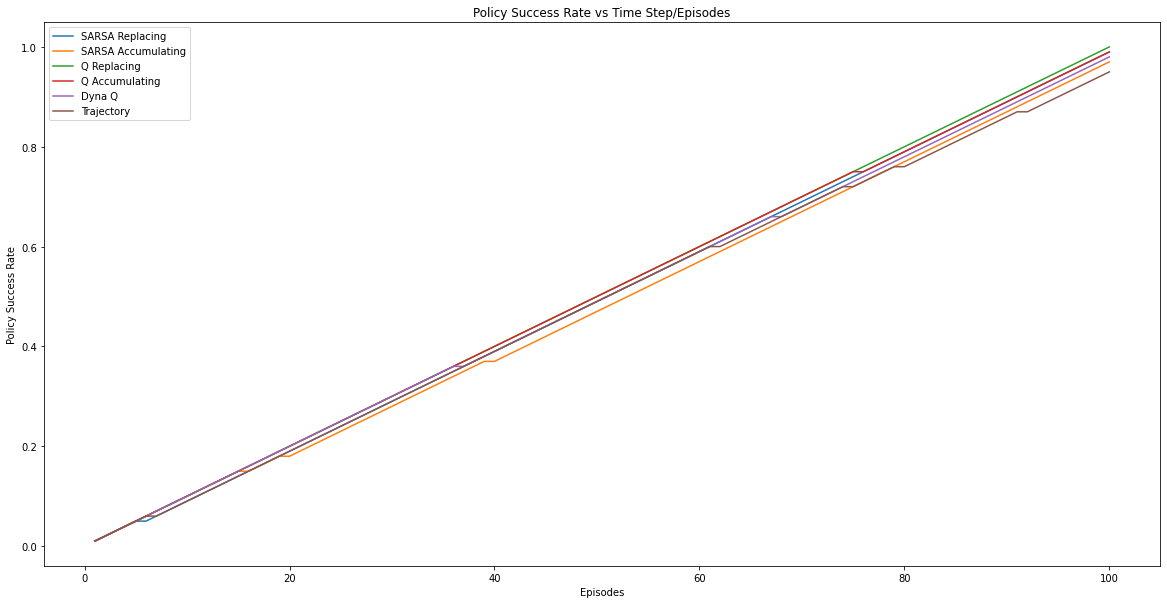

In [41]:
policy = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 0., 0.]) #All 6 algo have same policy = same graph

env= gym.make('environments:random_maze-v0')
env.seed(373)

plt.figure(figsize=(20,10))
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "SARSA Replacing")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "SARSA Accumulating")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "Q Replacing")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "Q Accumulating")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "Dyna Q")
plt.plot(np.arange(start=1,stop=101), get_policy_success_rate(env,policy,3), label = "Trajectory")
plt.xlabel("Episodes")
plt.ylabel("Policy Success Rate")
plt.title("Policy Success Rate vs Time Step/Episodes")
plt.legend()
plt.show()

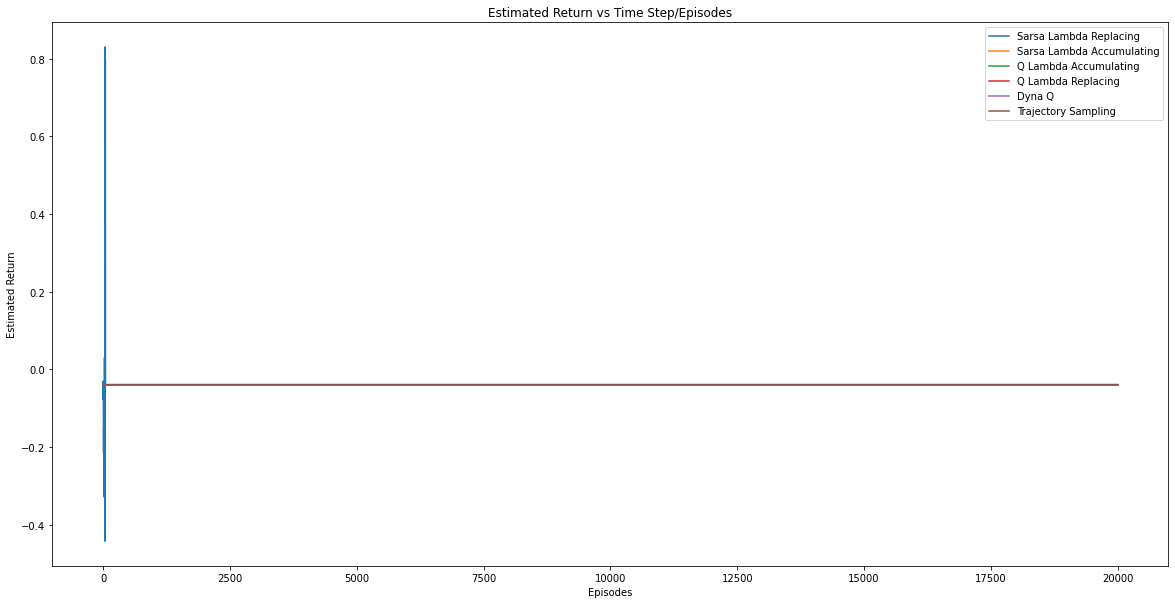

In [42]:
policy = np.array([2., 2., 2., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

env= gym.make('environments:random_maze-v0')
env.seed(373)
estimated_sarsa_lamb = estimated_return(env, q_value_sarsa_lamb, policy)
estimated_sarsa_lamb_f = estimated_return(env, q_value_sarsa_lamb_f, policy)
estimated_q_lamb_f = estimated_return(env, q_value_q_lamb_f, policy)
estimated_q_lamb_t = estimated_return(env, q_value_q_lamb_t, policy)
estimated_dyna_q = estimated_return(env, q_value_dyna_q, policy)
estimated_tj_sampling = estimated_return(env, q_value_tj_sampling, policy)

plt.figure(figsize=(20,10))
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_sarsa_lamb, label = "Sarsa Lambda Replacing")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_sarsa_lamb_f, label = "Sarsa Lambda Accumulating")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_q_lamb_f, label = "Q Lambda Accumulating")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_q_lamb_t, label = "Q Lambda Replacing")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_dyna_q, label = "Dyna Q")
plt.plot(np.arange(start=1,stop=noEpisodes+1), estimated_tj_sampling, label = "Trajectory Sampling")
plt.xlabel("Episodes")
plt.ylabel("Estimated Return")
plt.title("Estimated Return vs Time Step/Episodes")
plt.legend()
plt.show()

# Convert this to markdown cell. Write hyperparamter settings and observations here.
a) Saved as q12
b) Same Policy would imply almost similar graph. Accurate policy as the value reaches almost 1 at the end.
c) Saved as q12_2
d) Constant